# Exploring the Capital Bikeshare data set

In [74]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

## Aims of data exploration

- Get a sense of the data

Questions to address:

- Which factors contribute most to the number of bicycles being checkout out over the course of a given day?
- How much of an impact does weather have on demand?
- How does the behavior of casual users differ from subscribers?


Aims of the project:

“Given the forecasted weather conditions, how many bicycles can we expect to be checkout this Saturday at 2pm?”

Important information to take into account for prediction:
- Effect of weather
- Effect of day (weekday vs. weekend)
- Effect of time (2 pm)

## Import data

In [49]:
df = pd.read_csv('train_bike.csv', index_col=0)

In [50]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1020.6+ KB


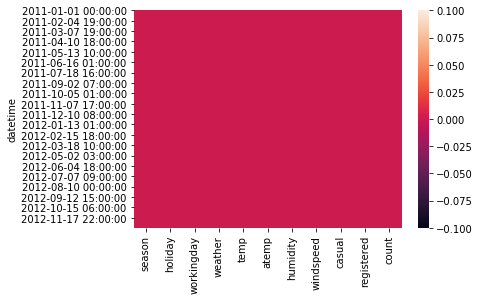

In [7]:
a check for missing data

sns.heatmap(df.isna())

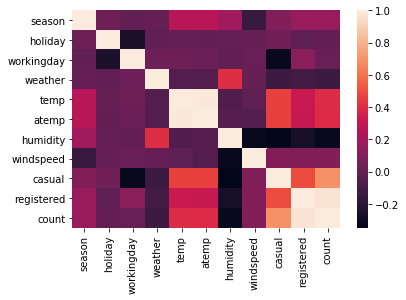

In [8]:
# quick look at correlations: what columns is "count" (= no. bikes rented on a given day) correlated with?

sns.heatmap(df.corr())

Some quick notes:
- (disregard casual/registered in this plot as casual + registered = count)
- workingday/holiday and casual are linked (suggesting the workday/weekend distinction is important for casual users; less so for registered users)
- temperature is  correlated with count; "weather" less so (possibly because it is a less granular measure and therefore captures data trends at a higher level); humidity is not correlated (this is surprising given my experience of DC summers, but it's possible that humidity is confounded with season); windspeed is somewhat correlated


### Understanding the data

- Is the distinction between actual and felt temperature important? (Is felt temperature going to incorporate values from wind and humidity data, potentially introducing a confound?)

### How to assess strength of factors that affect count:

- linear regression analysis with p-values
- mixed model: binary casual/registered distinction, predicting linear outcome

## Plotting: Weather

Look at how seasonal weather patterns affect total bike rentals. (No separation for now between casual and registered riders.)
- Different plot for each season (easier to grasp); same x and y axis
- Vertical lines for "weather" (in background; inspiration from colour coded climate change bars: https://www.smithsonianmag.com/smart-news/knitting-enthusiasts-are-using-their-craft-visualize-climate-change-180974231/)
- Solid connected lines for total bike rentals
- Scatterplots in different colours for temperature, humidity, wind speed
(This will be a very busy set of plots... but can narrow things down later)

## Plotting: Ridership Over Time By Rider Category

Start by getting a sense of how the two categories of ridership compare in their behaviour, and how ridership has evolved in the two-year time span covered by this data set.

In [93]:
# Create new df with totals aggregated over each day

# first separate out hour and day in new columns

# set index as column

df.reset_index(inplace = True)

df['hour'] = pd.to_datetime(df['datetime']).dt.hour

df['date'] = pd.to_datetime(df['datetime']).dt.date

df['month'] = pd.to_datetime(df['datetime']).dt.month

df['year'] = pd.to_datetime(df['datetime']).dt.year

df.set_index('datetime', inplace = True)

In [92]:
# now count totals by day

days = df.groupby(['date']).sum()
days.reset_index(inplace = True)
days

,date,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month
0,2011-01-01,24,0,0,38,338.66,436.350,1934,257.9969,331,654,985,276,24
1,2011-01-02,23,0,0,45,342.76,406.800,1601,382.9988,131,670,801,271,23
2,2011-01-03,22,0,22,22,177.12,208.345,962,366.0076,120,1229,1349,271,22
3,2011-01-04,23,0,23,24,188.60,243.940,1358,247.0156,108,1454,1562,273,23
4,2011-01-05,23,0,23,23,214.02,263.660,1005,288.0129,82,1518,1600,273,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,2012-12-15,96,0,0,33,318.98,406.060,1561,171.0108,767,4280,5047,276,288
452,2012-12-16,96,0,0,49,356.70,443.925,2013,161.9926,538,3248,3786,276,288
453,2012-12-17,96,0,24,51,387.04,481.800,2177,157.9994,212,4373,4585,276,288
454,2012-12-18,96,0,24,29,404.26,491.650,1599,356.0179,433,5124,5557,276,288


In [71]:
days['date'].min()

datetime.date(2011, 1, 1)

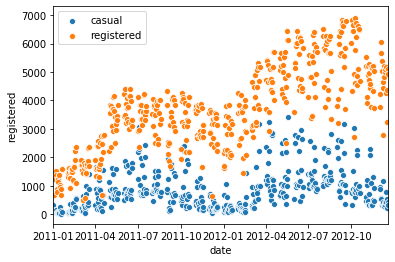

In [83]:
# plot total rentals across time, separated by ridership

sns.scatterplot(x = 'date', y = 'casual', data = days, label = 'casual')
sns.scatterplot(x = 'date', y = 'registered', data = days, label = 'registered')
plt.xlim(df['date'][0], df['date'][-1])
plt.legend()

Conclusions from this plots:
- Steadily increasing overall ridership over the two-year time period.
- Surges in the summer months across both ridership groups.
- Rentals by registered riders overall consistently higher per day than rentals by casual riders -- though the two groups sometimes overlap in their rental numbers.

In [128]:
# Aggregate across months

# 2011

months_2011 = df.loc[df['year'] == 2011]

months_2011 = months_2011.groupby(['month']).sum()
months_2011.reset_index(inplace = True)
months_2011

# 2012

months_2012 = df.loc[df['year'] == 2012]

months_2012 = months_2012.groupby(['month']).sum()
months_2012.reset_index(inplace = True)
months_2012

,month,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,year
0,1,453,47,286,617,4977.40,6035.580,25157,6965.1592,5244,51088,56332,5235,911436
1,2,455,0,311,699,5576.82,6849.915,26826,5664.1532,5521,60748,66269,5241,915460
2,3,455,0,312,620,8055.68,9599.080,26125,6691.1828,17146,77620,94766,5242,915460
3,4,908,24,310,565,8926.52,10611.930,20469,6954.0841,27584,89301,116885,5237,913448
4,5,912,0,336,696,10861.72,12681.180,29525,5578.0448,25420,95014,120434,5244,917472
5,6,912,0,312,611,11827.68,13600.925,27008,5822.0990,28974,101983,130957,5244,917472
6,7,1368,24,312,605,14462.34,16319.845,25719,4596.0526,24802,96967,121769,5244,917472
7,8,1368,0,312,620,13591.50,14948.725,29118,5190.1081,28290,101930,130220,5244,917472
8,9,1368,24,288,624,12044.16,13899.490,30623,5312.1553,27590,105835,133425,5244,917472
9,10,1824,24,336,694,9559.56,11271.945,30670,5235.1187,20928,106984,127912,5244,917472


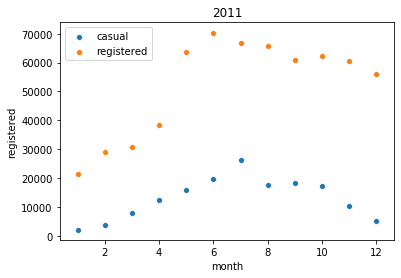

Text(0.5, 1.0, '2012')

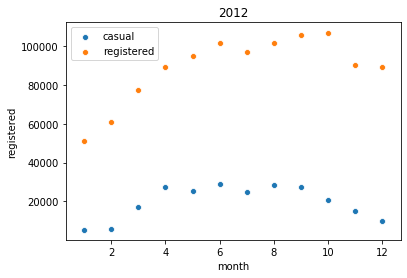

In [135]:
# Plot ridership by month each year

sns.scatterplot(x = 'month', y = 'casual', data = months_2011, label = 'casual')
sns.scatterplot(x = 'month', y = 'registered', data = months_2011, label = 'registered')
plt.legend()
plt.title('2011')
plt.show()
plt.close()


sns.scatterplot(x = 'month', y = 'casual', data = months_2012, label = 'casual')
sns.scatterplot(x = 'month', y = 'registered', data = months_2012, label = 'registered')
plt.legend()
plt.title('2012')

## Plotting: Weekdays and Holidays

- How does weekday and holiday status affect bike rentals?

- First thing to explore: Do we need to break out holidays from weekends? Or can we do a work day/not work day distinction?

### Weekdays Plots
- Choice: Box plot to show range of distribution
- Secondary choice: plot by season

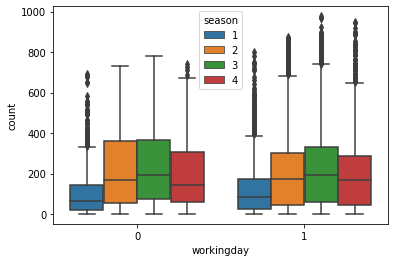

In [137]:
# Plot rentals: weekday vs. non weekday
sns.boxplot(x = 'workingday', y = 'count', hue = 'season', data = df)

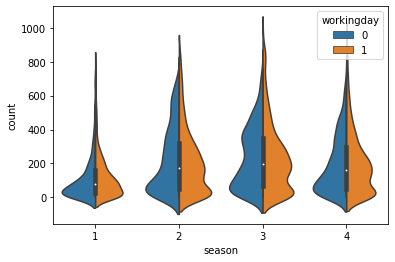

In [18]:
# asymmetric violin plot

sns.violinplot(x = 'season', y = 'count', hue = 'workingday',
                    data = df, split=True)

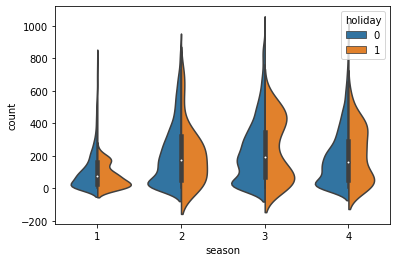

In [21]:
sns.violinplot(x = 'season', y = 'count', hue = 'holiday',
                    data = df, split=True)

Conclusions from comparing holiday and workingday rental volume:
- Holidays (1; orange in this plot) behave similarly to non-working days (0; blue in the plot before)
- For simplicity I'll distinguish between workdays and non-workdays

Some conclusions from this:
- Seasonal patterns are similar across day type -- with highest no. of rentals in summer, and lowest ones in winter
- Long-tailed distribution for most season
- These graphs doesn't let us see difference between the casual and registered ridership. For this purpose, an asymmetrical violin plot could be helpful.
- The violin plot suggests that there are bimodal distributions: in summer, it seems like the counts are either very low or quite high. Except in winter, workday distributions are always bimodal. Since this is hour-by-hour data, this looks like a "rush hour" kind of phenomenon.

Another thought:
- This data is all hour by hour. 
- To get a more coarse-grained overview of patterns of demand, I might want to look at averages over a full day (midnight to midnight).
- And we haven't looked at ridership yet.

## Plotting: Time of day
- For each type of day, plot activity
- Possibility: plot by season
- Another possibility: plot by casual/registered user?
- Not reflected in heatmap as this collapsed across days (but data points available for every hour)